
# **Introduction to PyTorch**
### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**

---




In this lesson, we learn to create a **simple Convolutional Neural Network model** in PyTorch and train it to **recognize handwritten digits in the MNIST dataset.**
1. Import PyTorch library and functions
2. Define our Transformer
3. Load our dataset
4. Inspect and Visualization our image dataset
5. Create our Data Loader for load batches of images
6. Building our Model
7. Training our Model
8. Analyizing it's Accuracy
9. Saving our Model
10. Plotting our training logs

PyTorch 소개
MNIST 데이터셋에 대한 간단한 CNN 훈련 - 수기 숫자

이 수업에서는 PyTorch에서 간단한 컨볼루션 신경망 모델을 만들고

MNIST 데이터 세트에서 손으로 쓴 숫자를 인식하도록 훈련하는 방법을 배운다.

1. PyTorch 라이브러리 및 함수 가져오기
2. 트랜스포머 정의
3. 데이터 세트 로드
4. 이미지 데이터 세트 검사 및 시각화
5. 이미지 로드 배치를 위한 데이터 로더 만들기
6. 모델 구축
7. 모델 교육
8. 정확성 분석
9. 모델 저장
10. 교육 로그를 작성하는 중

### **1. Import our libaries and modules**

We import PyTorch by importing ```torch```. We'll be using **torchvision** which is a PyTorch package that consists of popular datasets, model acrhitectures and common image transformations.

In [2]:
# PyTorch를 임포트합니다.
import torch

# torchvision을 사용하여 데이터셋과 유용한 이미지 변환들을 가져옵니다.
import torchvision
import torchvision.transforms as transforms

# PyTorch의 최적화 라이브러리와 nn을 임포트합니다.
# nn은 네트워크 그래프를 위한 기본 구성 블록으로 사용됩니다.
import torch.optim as optim
import torch.nn as nn

# CUDA가 사용 가능한지 확인합니다.
print("CUDA available: {}".format(torch.cuda.is_available()))

CUDA available: True


#### If GPU is available set device = ```'cuda'``` if not set device = ```'cpu'```

In [3]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

### **2. We define our transformer**

Transfomers are needed to cast the image data into the required format for input into our model.

- It's composed using the ```transforms.Compose``` function
- We chain the commands or instructions for our pipeline as the arguements
- We use ```transforms.ToTensor()``` to convert the image data into a PyTorch Tensor
- We use ```transforms.Normalize()``` to normalize our pixel values
- By passing the input as ```(0.5, ), (0.5,)``` we Normalize our image data between -1 and +1
- Note for RGB images we use ```transformed.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))``` instead

**NOTE**:
Our raw pixel values in our MNIST dataset range from 0 to 255. Each image is 28 pixels heigh and 28 pixels wide, with a depth of 1 as it's grayscale.

**Why Normalize?**

1. To ensure all features, or in our case, pixel intensities, are weighted equally when training our CNN
2. Makes training faster as it avoids oscilations during training
3. Removes and bias or skewness in our image data


**Why 0.5?**

Normalization is done like this:

`image = (image - mean) / std`

Using the parameters 0.5,0.5 sets the Mean and STD to 0.5. Using the formula above this gives us:

- Min value = `(0-0.5)/0.5 = 1`
- Max value = `(1-0.5)/0.5 = -1`

For color images we use a tuple of (0.5,0.5,0.5) to set the Mean of the RGB channels to 0.5 and another tuple of (0.5, 0.5, 0.5) to set the STD to 0.5

In [4]:
# 이미지 데이터를 PyTorch 텐서로 변환하고 -1과 +1 사이로 정규화합니다
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

### **3. Fetch our MNIST Dataset using torchvision**

**NOTE**

- Many online tutorials state transforms are applied upon loading. That is NOT true. Transformers are only applied when loaded by our Data Loader.
- Our dataset is left unchanged, only batches of images loaded by the our Data Loader are copied and transformed every iteration.
- View other datasets that can be accesed via torchvision here - https://pytorch.org/vision/stable/datasets.html

In [6]:
# 훈련 데이터를 로드하고 로딩 시 사용할 변환을 지정합니다
trainset = torchvision.datasets.MNIST('mnist',
                                      train=True, # 트레이닝 데이터셋 가져옴
                                      download=True, # false 일시 하드웨어에서 가져옴
                                      transform=transform) # 2번에서 정의한 transform이다.

# 테스트 데이터를 로드하고 로딩 시 사용할 변환을 지정합니다
testset = torchvision.datasets.MNIST('mnist',
                                     train=False,
                                     download=True,
                                     transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17293878.28it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 497072.99it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4375432.28it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4144121.99it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



### **About Training and Test Data**

There are two subsets of the data being used here:

- **Training data** Data that is used to optimize model parameters (used during training)

모델 매개변수를 최적화하는 데 사용됩니다 (훈련 중 사용)

- **Test/Validation data** Data that is used to evaluate the model performance

모델 성능을 평가하는 데 사용

During training, we monitor model performance on the test data.

훈련 동안에는 테스트 데이터에 대한 모델 성능을 지속적으로 모니터링하여, 모델이 올바르게 학습하고 있는지 확인합니다.

**Good Machine Learning Practice**

좋은 머신러닝 실천법

Often we keep another **test set** for testing the final model in order to get an unbiased estimate of *out of sample* accuracy.

종종 최종 모델을 테스트하기 위해 별도의 테스트 세트를 보유하는 것이 일반적입니다. 이는 모델이 샘플 외 데이터에 대해 얼마나 잘 수행하는지에 대한 편향되지 않은 추정치를 얻기 위함입니다.

However, MNIST doesn't have a separate test set. Therefore, we use the test set for both validation and test.

하지만 MNIST 데이터셋은 별도의 테스트 세트를 제공하지 않습니다. 따라서 검증과 테스트 모두에 동일한 테스트 세트를 사용합니다. 이는 일반적인 분할 방식과 다를 수 있으나, MNIST의 경우 널리 허용되고 사용되는 방식입니다.

### **4. Let's inpsect a sample of our training data**




Let's inspect our training and test dataset dimensions.

In [7]:
# 훈련 데이터에는 60,000개의 이미지 샘플이 있고, 테스트 데이터에는 10,000개가 있습니다.
# 각 이미지는 28 x 28 픽셀이며, 그레이스케일 이미지이므로 이미지의 3차원은 없습니다.
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


#### **Let's look at the an Individual Sample of Data**

You will see that our data has not yet been normalized between -1 and 1.

데이터가 -1과 1 사이에서 아직 정규화되지 않았음을 알 수 있습니다.

In [8]:
# 데이터 세트의 첫번째 값
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

### **Can we plot this in OpenCV?**

OpenCV에서 이걸 플롯할 수 있을까요?

Yes we can, but we'll need to convert our tensor to a numpy array. Fortunately. that's quite easy.

네, 할 수 있지만 텐서를 numpy 배열로 변환해야 해요. 다행히도 꽤 쉬워요.

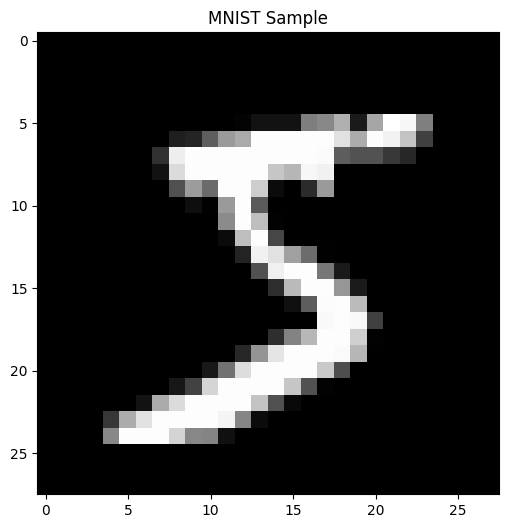

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# imshow 정의
def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# 이미지를 숫자 배열로 변환
image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)

### **Alternatively we can use matplotlib to show many examples from our dataset**

또는 matplotlib을 사용하여 데이터 세트에서 많은 예를 보여줄 수 있습니다

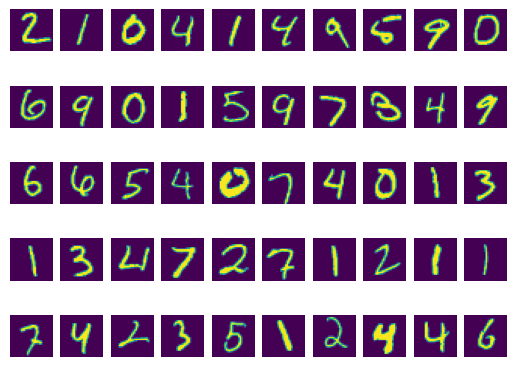

In [14]:
import matplotlib.pyplot as plt

# MNIST 훈련 데이터 세트에서 첫 번째 이미지 50개를 시각화합니다.
figure = plt.figure()
num_of_images = 50  # 표시할 이미지 수

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)  # 5행 10열의 서브플롯 생성
    plt.axis('off')  # 축 표시 제거
    plt.imshow(testset.data[index])  # 이미지를 그레이스케일로 표시


### **5. Create our Data Loader**

A **Data Loader** is a function that we'll use to grab our data in specified batch sizes (we'll use 128) during training.

Remember we can't feed all our data through the network at once, therefore that is why we split data into batches.

We set **shuffle** equal to True to prevent data sequence bias. For example, in some datasets the each class in usually in order, so to avoid loading batches of only a single class, we shuffle our data.

```num_workers``` specifies how many CPU cores we wish to utilize, setting it 0 means that it will be the main process that will do the data loading when needed. Leave it as 0 unless you wish to experiment futher.

In [15]:
# Prepare train and test loader
trainloader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 128,
                                           shuffle = True,
                                           num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

#### **Using Iter and Next() for load batches**


In [17]:
# trainloader 객체의 이터레이터를 반환합니다
dataiter = iter(trainloader)

# 이터레이터에서 첫 번째 배치의 데이터를 가져옵니다
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [18]:
images[0].shape

torch.Size([1, 28, 28])

### **Alterantively PyTorch provides it's own Image Plotting Tool**

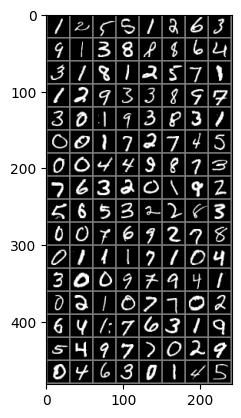

1 2 5 5 1 2 6 3 9 1 3 8 8 8 6 4 3 1 8 1 2 5 7 1 1 2 9 3 3 8 9 7 3 0 1 9 3 8 3 1 0 0 1 7 2 7 4 3 0 0 4 4 9 8 7 3 7 6 3 2 0 1 9 2 5 6 5 3 2 2 8 3 0 0 7 6 9 2 7 8 0 1 1 1 7 1 0 4 3 0 0 9 7 9 4 1 0 2 1 0 7 7 0 2 6 4 1 7 6 3 1 9 5 4 9 7 7 0 2 9 0 4 6 3 0 1 4 5


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 표시하는 함수
def imshow(img):
    img = img / 2 + 0.5     # 정규화를 해제합니다
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 일부 랜덤한 훈련 이미지를 가져옵니다
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지를 표시합니다
imshow(torchvision.utils.make_grid(images))

# 레이블을 출력합니다
print(' '.join('%1s' % labels[j].numpy() for j in range(128)))


# **6. Now we build our Model**

We will use the ```nn.Sequential``` method to construct our model. Alernatively we can use the functional module, however this is simpler and more similar to styles you'll work with in Keras.

### **Building a Convolution Filter Layer**

```
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)
```

- **in_channels (int)** — This is the number of channels in the input image (for grayscale images use 1 and for RGB color images use 3)
- **out_channels (int)** — This is the number of channels produced by the convolution. We use 32 channels or 32 filters. **NOTE** 32 will be the number of **in_channels** in the next network layer.
- **kernel_size (int or tuple)** — This is the size of the convolving kernel. We use 3 here, which gives a kernel size of 3 x 3.
- **stride (int or tuple, optional)** — Stride of the convolution. (Default: 1)
- **padding (int or tuple, optional)** — Zero-padding added to both sides of the input (Default: 0). We use a padding = 1.

### **The Max Pool Layer**

- Each pooling layer i.e., nn.MaxPool2d(2, 2) halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

**What is torch.nn.functional?**

Generally imported into the namespace F by convention, this module contains all the functions in the torch.nn library (whereas other parts of the library contain classes). As well as a wide range of loss and activation functions, you’ll also find here some convenient functions for creating neural nets, such as pooling functions. (There are also functions for doing convolutions, linear layers, etc, but as we’ll see, these are usually better handled using other parts of the library.)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# 모델을 Python 클래스로 생성
class Net(nn.Module):
    def __init__(self):
        # super는 nn.Module의 서브클래스로, 모든 메서드를 상속받습니다
        super(Net, self).__init__()

        # 레이어 객체를 정의합니다
        # 첫 번째 CNN 레이어, 32개의 3x3 크기 필터, stride 1, padding 0
        self.conv1 = nn.Conv2d(1, 32, 3)
        # 두 번째 CNN 레이어, 64개의 3x3 크기 필터, stride 1, padding 0
        self.conv2 = nn.Conv2d(32, 64, 3)
        # Max Pool 레이어, 2x2 커널, stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # 첫 번째 완전 연결 레이어 (Linear), Max Pool의 출력을 받아서
        # 12 x 12 x 64 크기의 출력을 128개의 노드에 연결합니다
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        # 두 번째 완전 연결 레이어, 128개의 노드를 10개의 출력 노드(클래스)로 연결합니다
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 여기에서 순방향 전파 순서를 정의합니다
        # 순서는 Conv1 - Relu - Conv2 - Relu - Max Pool - Flatten - FC1 - FC2 입니다
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 인스턴스를 생성하고 CUDA 디바이스로 이동시킵니다 (메모리와 연산을)
net = Net()
net.to(device)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

#### **Same code as above but without the distracting comments**

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### **Printing out our Model**

In [24]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### **7. Defining a Loss Function and Optimizer**

손실 함수 및 최적화기 정의

We need to define what type of loss we'll be using and what method will be using to update the gradients.
1. We use Cross Entropy Loss as it is a multi-class problem
2. We use Stochastic Gradient Descent (SGD) - we also specify a learn rate (LR) of 0.001 and momentum 0.9

우리는 우리가 사용할 손실 유형과 그래디언트를 업데이트하기 위해 사용할 방법을 정의해야 한다.

1. 우리는 교차 엔트로피 손실이 다중 클래스 문제이기 때문에 사용합니다
2. SGD(Stochastic Gradient Descent)를 사용합니다. 학습률(LR)도 0.001, 모멘텀 0.9로 지정합니다

In [25]:
# optimizer 함수를 가져옵니다
import torch.optim as optim

# Cross Entropy Loss를 손실 함수로 사용합니다
criterion = nn.CrossEntropyLoss()

# 경사 하강법 알고리즘 또는 Optimizer를 설정합니다
# 학습률(learning rate)을 0.001로 설정한 Stochastic Gradient Descent (SGD)를 사용합니다
# 모멘텀(momentum)을 0.9로 설정합니다
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### **8. Training Our Model**

In PyTorch we use the building block functions to execute the training algorithm that we should be somewhat familar with by now.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%207.04.32%402x.png)

In [26]:
# 학습 데이터셋을 여러 번 반복하여 학습합니다 (각 반복을 epoch라고 합니다)
epochs = 10

# 로그를 저장할 빈 배열을 만듭니다
epoch_log = []
loss_log = []
accuracy_log = []

# 지정된 횟수만큼 에포크를 반복합니다
for epoch in range(epochs):
    print(f'에포크 시작: {epoch+1}...')

    # 각 미니 배치 후 손실을 누적하여 running_loss에 추가합니다
    running_loss = 0.0

    # trainloader 이터레이터를 통해 반복합니다
    # 각 사이클은 하나의 미니 배치입니다
    for i, data in enumerate(trainloader, 0):
        # 입력 데이터를 가져옵니다; data는 [입력, 레이블]의 리스트입니다
        inputs, labels = data

        # 데이터를 GPU로 이동합니다
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 훈련 전에 그래디언트를 0으로 초기화합니다
        # 새로 시작하기 위해 필요합니다
        optimizer.zero_grad()

        # 순전파 -> 역전파 + 최적화
        outputs = net(inputs) # 순전파
        loss = criterion(outputs, labels) # 손실 계산 (결과와 예측 간의 차이를 정량화)
        loss.backward() # 역전파를 통해 모든 노드의 새로운 그래디언트 계산
        optimizer.step() # 그래디언트/가중치 업데이트

        # 훈련 통계 출력 - 에포크/반복/손실/정확도
        running_loss += loss.item()
        if i % 50 == 49:    # 50개 미니 배치마다 손실 출력
            correct = 0 # 올바른 예측 개수를 저장할 변수를 초기화
            total = 0 # 반복된 레이블 수를 저장할 변수를 초기화

            # 검증을 위해 그래디언트가 필요 없으므로
            # 메모리를 절약하기 위해 no_grad로 래핑
            with torch.no_grad():
                # testloader 이터레이터를 통해 반복합니다
                for data in testloader:
                    images, labels = data
                    # 데이터를 GPU로 이동합니다
                    images = images.to(device)
                    labels = labels.to(device)

                    # 테스트 데이터 배치를 모델을 통해 순전파
                    outputs = net(images)

                    # 예측된 출력 텐서의 최대값에서 예측값을 가져옵니다
                    # dim = 1은 축소할 차원의 수를 지정합니다
                    _, predicted = torch.max(outputs.data, dim=1)
                    # total 변수에 레이블의 크기 또는 길이를 계속 더합니다
                    total += labels.size(0)
                    # 올바르게 예측된 예측 개수를 계속 합산합니다
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'에포크: {epoch_num}, 완료된 미니 배치 수: {(i+1)}, 손실: {actual_loss:.3f}, 테스트 정확도 = {accuracy:.3f}%')
                running_loss = 0.0

    # 각 에포크 후 학습 통계를 저장합니다
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('훈련 완료')


에포크 시작: 1...
에포크: 1, 완료된 미니 배치 수: 50, 손실: 2.273, 테스트 정확도 = 36.470%
에포크: 1, 완료된 미니 배치 수: 100, 손실: 2.137, 테스트 정확도 = 57.730%
에포크: 1, 완료된 미니 배치 수: 150, 손실: 1.720, 테스트 정확도 = 78.230%
에포크: 1, 완료된 미니 배치 수: 200, 손실: 0.934, 테스트 정확도 = 83.510%
에포크: 1, 완료된 미니 배치 수: 250, 손실: 0.556, 테스트 정확도 = 85.610%
에포크: 1, 완료된 미니 배치 수: 300, 손실: 0.464, 테스트 정확도 = 86.940%
에포크: 1, 완료된 미니 배치 수: 350, 손실: 0.441, 테스트 정확도 = 89.000%
에포크: 1, 완료된 미니 배치 수: 400, 손실: 0.402, 테스트 정확도 = 89.120%
에포크: 1, 완료된 미니 배치 수: 450, 손실: 0.390, 테스트 정확도 = 88.420%
에포크 시작: 2...
에포크: 2, 완료된 미니 배치 수: 50, 손실: 0.361, 테스트 정확도 = 90.650%
에포크: 2, 완료된 미니 배치 수: 100, 손실: 0.353, 테스트 정확도 = 89.270%
에포크: 2, 완료된 미니 배치 수: 150, 손실: 0.373, 테스트 정확도 = 89.920%
에포크: 2, 완료된 미니 배치 수: 200, 손실: 0.327, 테스트 정확도 = 91.150%
에포크: 2, 완료된 미니 배치 수: 250, 손실: 0.319, 테스트 정확도 = 90.010%
에포크: 2, 완료된 미니 배치 수: 300, 손실: 0.314, 테스트 정확도 = 90.980%
에포크: 2, 완료된 미니 배치 수: 350, 손실: 0.304, 테스트 정확도 = 91.600%
에포크: 2, 완료된 미니 배치 수: 400, 손실: 0.319, 테스트 정확도 = 91.260%
에포크: 2, 완료된 미니 배치 수: 450, 손실: 0.287, 테스트 

## **9. Saving Our Model**

We use the ```torch.save()``` function to save our model.

```net.state_dict()``` saves our model weights in a dictionay format.

In [27]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

### **Let's look at some images from your Test Data and view their Ground Truth labels**

테스트 데이터에서 일부 이미지를 보고 해당 Ground Truth 레이블을 확인해 보겠습니다

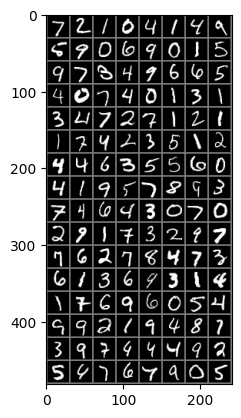

정답:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [29]:
# 하나의 미니 배치 로드
dataiter = iter(testloader)
images, labels = next(dataiter)

# torchvision의 utils.make_grid()를 사용하여 이미지 표시
imshow(torchvision.utils.make_grid(images))
print('정답: ', ''.join('%1s' % labels[j].numpy() for j in range(128)))


### **Let's reload the model we just saved**

방금 저장한 모델을 다시 로드

In [30]:
# 모델 인스턴스를 생성하고 CUDA 장치로 이동합니다 (메모리와 연산을 CUDA로 이동)
net = Net()
net.to(device)

# 지정된 경로에서 가중치를 로드합니다
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

#### **Getting Predictions**

Note when working with tensors on the GPU, we have to convert it back to a numpy array to perform python operations on it.

```your_tensor.cpu().numpy()```

In [31]:
## 하나의 미니 배치를 순전파하고 예측된 출력을 얻습니다
# Python 함수 iter를 사용하여 train_loader 객체에 대한 이터레이터를 반환합니다
test_iter = iter(testloader)

# next를 사용하여 이터레이터에서 첫 번째 배치 데이터를 가져옵니다
images, labels = next(test_iter)

# 데이터를 GPU로 이동합니다
images = images.to(device)
labels = labels.to(device)

# 모델을 사용하여 순전파를 수행합니다
outputs = net(images)

# torch.max를 사용하여 클래스 예측을 얻습니다
_, predicted = torch.max(outputs, 1)

# 128개의 예측값을 출력합니다
print('예측값: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

예측값:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873979449254767905


#### **Showing our Test Accuracy again**

In [33]:
correct = 0
total = 0

with torch.no_grad():  # 그래디언트를 계산하지 않음 (메모리 절약을 위해)
    for data in testloader:
        images, labels = data
        # 데이터를 GPU로 이동합니다
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'10000개의 테스트 이미지에 대한 네트워크의 정확도: {accuracy:.3}%')


10000개의 테스트 이미지에 대한 네트워크의 정확도: 98.0%


## **10. Plotting our Training Logs**

트래이닝 로그 기록 띄우기

Remember we created some lists to log our training stats?

우리가 훈련 통계를 기록하기 위해 몇 가지 목록을 만든 것을 기억하나요?

```
# Create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []
```

**Let's now plot those logs**

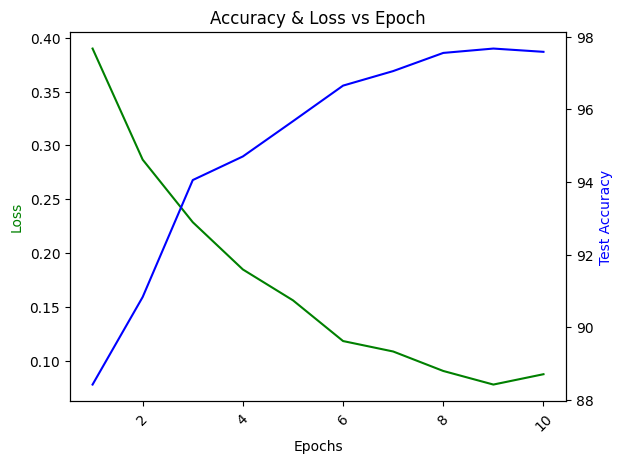

In [42]:
# 보조 y-축을 가진 플롯을 생성하려면 서브플롯을 생성해야 합니다
fig, ax1 = plt.subplots()

# 제목 설정 및 x-축 레이블 회전
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# twinx를 사용하여 보조 y-축을 생성합니다
ax2 = ax1.twinx()

# 손실 로그와 정확도 로그를 플롯합니다
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# 레이블 설정
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()


In [40]:
epoch_log = list(range(1,11))
epoch_log

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [41]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]